To access the datasets, you need to go to arimerm1/cs66/FinProj/project-zpottho1-arimerm1/code/DataSets/

This is our code to build the algorithm. We will go sequentially according to our listed goals.

We are starting using our smaller data set "dataSetWS.csv", which is all pitches thrown during the World Series. We are going to start with building a Random Forest for Righty Fastball and Curveball.

In [1]:
# import block
import numpy as np
import pandas as pd

import math
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib widget

In [2]:
# this function builds our first random forest classifier
# uses our smaller data set to attempt to distinguish
# between fastball and curveball pitch types

def fastCurveWS():
    xData = pd.read_csv('./DataSets/dataSetWS.csv')
    xData = xData.dropna()
    xData.rename(columns= {'Unnamed: 0':'ID'}, inplace = True)
    xData = xData[xData['p_throws'] == 'R']
    xData = xData[(xData['pitch_type'] == 'FF') | (xData['pitch_type'] == 'CU') | (xData['pitch_type'] == 'KC')]
    xData['pitch_type'] = xData['pitch_type'].replace('KC', 'CU')
    xData.pop('ID')
    xData.pop('player_name')
    xData.pop('p_throws')
    
    yData = xData.pop('pitch_type')
    #xData = normalize(xData)
    
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4, random_state=0)
    
    forest = RandomForestClassifier()
    forest.fit(xTrain, yTrain)
    theScore = forest.score(xTest, yTest)
    print(theScore)
    predictions = forest.predict(xTest)
    print(predictions)
    print(yTest)


In [3]:
fastCurveWS()

1.0
['FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'CU' 'FF'
 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'CU'
 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CU' 'CU'
 'FF' 'CU' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF'
 'FF' 'FF' 'CU' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'CU'
 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'CU' 'CU' 'FF' 'FF' 'FF' 'FF'
 'FF' 'CU' 'FF' 'CU' 'FF' 'CU' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF'
 'CU' 'CU' 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF'
 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'CU' 'CU' 'FF'
 'FF' 'FF' 'CU' 'FF' 'FF' 'CU' 'FF' 'FF' 'CU' 'CU' 'FF' 'FF' 'FF' 'CU'
 'FF' 'CU' 'CU' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF'
 'FF' 'CU' 'FF' 'CU' 'CU' 'CU' 'FF' 'CU' 'FF' 'FF' 'FF' 'CU' 'CU' 'FF'
 'FF' 'FF' 'FF' 'CU' 'FF' 'CU' 'FF' 'CU' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF'
 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CU' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF'
 '

We are now going to add the "Full" data set into our algorithm

In [4]:
# this function builds a random forest classifier
# uses both of our data set to attempt to distinguish
# between fastball and curveball pitch types

def fastCurve(data):
    if (data == "WS"):
        xData = pd.read_csv('./DataSets/dataSetWS.csv')
    elif (data == "Full"):
        xData = pd.read_csv('./DataSets/bigData.csv')
    
    xData = xData.dropna()
    xData.rename(columns= {'Unnamed: 0':'ID'}, inplace = True)
    xData = xData[xData['p_throws'] == 'R']
    xData = xData[(xData['pitch_type'] == 'FF') | (xData['pitch_type'] == 'CU') | (xData['pitch_type'] == 'KC')]
    xData['pitch_type'] = xData['pitch_type'].replace('KC', 'CU')
    xData.pop('ID')
    xData.pop('player_name')
    xData.pop('p_throws')
    
    yData = xData.pop('pitch_type')
    #xData = normalize(xData)
    
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4, random_state=0)
    
    forest = RandomForestClassifier()
    forest.fit(xTrain, yTrain)
    theScore = forest.score(xTest, yTest)
    print(theScore)
    predictions = forest.predict(xTest)
    print(predictions)
    print(yTest)

    

In [5]:
fastCurve("Full")

0.9999078563941903
['FF' 'FF' 'FF' ... 'FF' 'FF' 'FF']
81118     FF
70718     FF
458091    FF
127221    CU
167436    CU
          ..
428308    CU
401639    CU
231040    FF
586109    FF
63892     FF
Name: pitch_type, Length: 86821, dtype: object


Now adding a third pitch for our World Series data, changeup

In [6]:
# this function builds a random forest classifier
# uses our smaller data set to attempt to distinguish
# between fastball changeup and curveball pitch types

def fastCurveChangeWS():
    xData = pd.read_csv('./DataSets/dataSetWS.csv')
    xData = xData.dropna()
    xData.rename(columns= {'Unnamed: 0':'ID'}, inplace = True)
    xData = xData[xData['p_throws'] == 'R']
    xData = xData[(xData['pitch_type'] == 'FF') | (xData['pitch_type'] == 'CU') | (xData['pitch_type'] == 'KC') | (xData['pitch_type'] == 'CH')]
    xData['pitch_type'] = xData['pitch_type'].replace('KC', 'CU')
    xData.pop('ID')
    xData.pop('player_name')
    xData.pop('p_throws')
    
    yData = xData.pop('pitch_type')
    #xData = normalize(xData)
    
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4, random_state=0)
    
    forest = RandomForestClassifier()
    forest.fit(xTrain, yTrain)
    theScore = forest.score(xTest, yTest)
    print(theScore)
    predictions = forest.predict(xTest)
    print(predictions)
    print(yTest)
    return xData

In [7]:
xData = fastCurveChangeWS()
xData

0.9960629921259843
['FF' 'CH' 'FF' 'CH' 'FF' 'CU' 'CH' 'FF' 'FF' 'FF' 'CU' 'FF' 'CH' 'FF'
 'CH' 'FF' 'CU' 'CH' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF'
 'FF' 'FF' 'CH' 'CH' 'CH' 'FF' 'FF' 'CU' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF'
 'CH' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CH' 'CU' 'FF' 'CH'
 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF' 'CH' 'FF' 'CU' 'FF' 'FF'
 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'CH' 'FF' 'CH' 'FF' 'CU' 'FF'
 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'CH' 'FF' 'FF' 'FF'
 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CH' 'FF' 'CU' 'FF' 'FF'
 'FF' 'CU' 'CH' 'FF' 'CH' 'FF' 'FF' 'FF' 'FF' 'CU' 'CU' 'FF' 'FF' 'FF'
 'CU' 'CU' 'FF' 'FF' 'CH' 'FF' 'FF' 'FF' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF'
 'CH' 'FF' 'FF' 'CU' 'FF' 'FF' 'CU' 'CU' 'CH' 'FF' 'CH' 'CU' 'FF' 'CH'
 'CU' 'FF' 'FF' 'CH' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CH' 'FF' 'FF' 'CH'
 'FF' 'CU' 'CU' 'CH' 'FF' 'CU' 'FF' 'FF' 'FF' 'FF' 'FF' 'FF' 'CH' 'CU'
 'FF' 'CU' 'CU' 'FF' 'FF' 'CU' 'CU' 'FF' 'FF' 'FF' 'CH' 'F

,release_speed,pfx_x,pfx_z,effective_speed,release_spin_rate
0,84.9,1.14,-0.90,83.8,2515
1,96.6,-0.35,1.45,95.9,2442
2,84.5,1.06,-0.87,83.5,2339
3,95.4,-0.63,1.56,94.7,2392
4,95.6,-0.14,1.67,94.8,2289
...,...,...,...,...,...
1481,77.8,0.60,-0.92,78.3,2037
1483,97.7,-1.15,1.13,98.1,2284
1486,76.5,0.71,-0.43,76.8,1792
1488,95.5,-1.00,1.12,96.3,2168


In [45]:
# code for our confusion matrix output

import matplotlib.pyplot as plt
import itertools
%matplotlib widget

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10)
    plt.yticks(tick_marks, classes,fontsize=10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)


In [34]:
# this function builds a random forest classifier
# uses both of our data sets to attempt to distinguish
# between fastball changeup and curveball pitch types

def fastCurveChange(data):
    if (data == "WS"):
        xData = pd.read_csv('./DataSets/dataSetWS.csv')
    elif (data == "Full"):
        xData = pd.read_csv('./DataSets/bigData.csv')
    
    xData = xData.dropna()
    xData.rename(columns= {'Unnamed: 0':'ID'}, inplace = True)
    xData = xData[xData['p_throws'] == 'R']
    xData = xData[(xData['pitch_type'] == 'FF') | (xData['pitch_type'] == 'CU') | (xData['pitch_type'] == 'KC') | (xData['pitch_type'] == 'CH')]
    xData['pitch_type'] = xData['pitch_type'].replace('KC', 'CU')
    xData.pop('ID')
    xData.pop('player_name')
    xData.pop('p_throws')
    
    yData = xData.pop('pitch_type')
    #xData = normalize(xData)
    
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4, random_state=0)
    
    forest = RandomForestClassifier()
    forest.fit(xTrain, yTrain)
    theScore = forest.score(xTest, yTest)
    print(theScore)
    predictions = forest.predict(xTest)
    print(predictions)
    print(yTest)
    confMat = confusion_matrix(yTest, predictions)
    print(confMat)
    plt.figure()
    plot_confusion_matrix(confMat, classes=np.sort(yTest.unique()),
                      title='Fastball/Changeup/Curveball Confusion\n Matrix for a Right Handed Pitcher')

    plt.show()


0.9967072616474822
['FF' 'FF' 'FF' ... 'CH' 'FF' 'FF']
634626    FF
407091    FF
554572    FF
151365    FF
333750    FF
          ..
146529    CU
228846    CH
194138    CH
493407    FF
462391    FF
Name: pitch_type, Length: 107813, dtype: object
[[20868    15   147]
 [    5 18562     1]
 [  184     3 68028]]


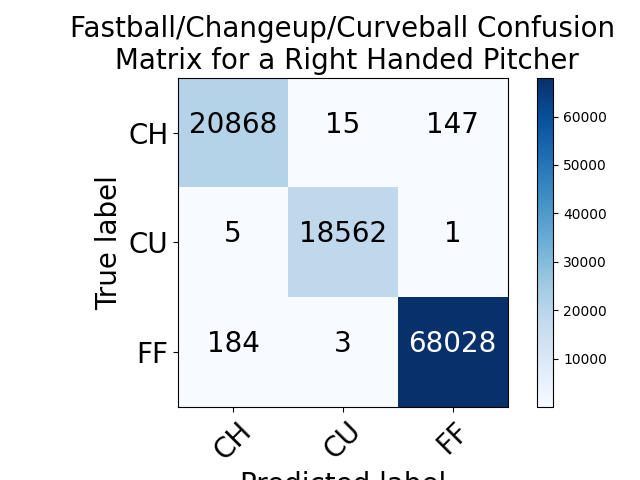

In [35]:
fastCurveChange("Full")

Attempting to create for the full data set

In [49]:
# this function builds a random forest classifier
# uses both of our data sets to attempt to distinguish
# between all pitch types except those that aren't real pitches

def everything(data, hand):
    if (data == "WS"):
        xData = pd.read_csv('./DataSets/dataSetWS.csv')
    elif (data == "Full"):
        xData = pd.read_csv('./DataSets/bigData.csv')
    
    xData = xData.dropna()
    xData.rename(columns= {'Unnamed: 0':'ID'}, inplace = True)
    
    if (hand == "R"):
        xData = xData[xData['p_throws'] == 'R']
    elif (hand == "L"):
        xData = xData[xData['p_throws'] == 'L']
        
    xData = xData[(xData['pitch_type'] != 'FA')]
    xData = xData[(xData['pitch_type'] != 'CS')]
    xData = xData[(xData['pitch_type'] != 'EP')]
    xData = xData[(xData['pitch_type'] != 'PO')]
    xData['pitch_type'] = xData['pitch_type'].replace('KC', 'CU')
    xData.pop('ID')
    xData.pop('player_name')
    xData.pop('p_throws')
    
    yData = xData.pop('pitch_type')
    #xData = normalize(xData)
    
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4, random_state=0)
    
    forest = RandomForestClassifier()
    forest.fit(xTrain, yTrain)
    theScore = forest.score(xTest, yTest)
    print(theScore)
    predictions = forest.predict(xTest)
    print(predictions)
    print(yTest)
    confMat = confusion_matrix(yTest, predictions)
    print(confMat)
    plt.figure()
    plot_confusion_matrix(confMat, classes=np.sort(yTest.unique()),
                      title='All Pitches Without Release Confusion\n Matrix for a Left Handed Pitcher')

    plt.show()


0.8456199169689746
['FF' 'CU' 'FF' ... 'FF' 'SL' 'FF']
413568    FF
584506    ST
37228     FF
550244    ST
148417    FF
          ..
562571    ST
162706    FF
646684    FF
327307    SL
487437    FF
Name: pitch_type, Length: 76357, dtype: object
[[ 9952     4    10    53    20   564     4     0     0]
 [    4  6338     9     1     0     0   707   283    25]
 [   14    26  3083   289     0    16  1712     5     0]
 [   79     0   222 23562     0  1542    66     4     0]
 [   93     0     0     2   166     0     4     0     0]
 [  498     0    10  1713     0  9942     5     0     0]
 [   11   502  1197    53     2     2  9660   541    17]
 [    0   243    29     2     0     0   944  1754    50]
 [    0    49     0     0     0     0    71    91   112]]


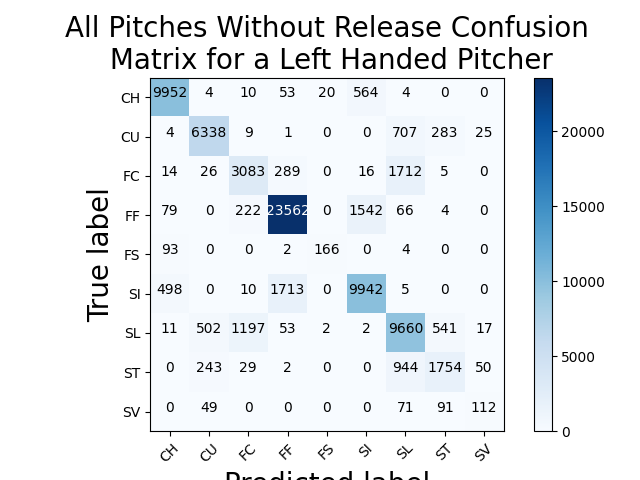

In [50]:
everything("Full", "L")

In [54]:
# this function builds a random forest classifier
# to distinguish between all pitches
# we added the feature of release height in the x and 
# z directions to improve our accuracy

def everythingWithRelease(hand):
    xData = pd.read_csv('./DataSets/fullWithRelease.csv')
    
    xData = xData.dropna()
    xData.rename(columns= {'Unnamed: 0':'ID'}, inplace = True)
    
    if (hand == "R"):
        xData = xData[xData['p_throws'] == 'R']
    elif (hand == "L"):
        xData = xData[xData['p_throws'] == 'L']
        
    xData = xData[(xData['pitch_type'] != 'FA')]
    xData = xData[(xData['pitch_type'] != 'CS')]
    xData = xData[(xData['pitch_type'] != 'EP')]
    xData = xData[(xData['pitch_type'] != 'PO')]
    xData['pitch_type'] = xData['pitch_type'].replace('KC', 'CU')
    xData.pop('ID')
    xData.pop('p_throws')
    
    yData = xData.pop('pitch_type')
    #xData = normalize(xData)
    
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4, random_state=0)
    
    forest = RandomForestClassifier()
    forest.fit(xTrain, yTrain)
    theScore = forest.score(xTest, yTest)
    print(theScore)
    predictions = forest.predict(xTest)
    print(predictions)
    print(yTest)
    confMat = confusion_matrix(yTest, predictions)
    print(confMat)
    plt.figure()
    plot_confusion_matrix(confMat, classes=np.sort(yTest.unique()),
                      title='All Pitches With Release Confusion\n Matrix for a Left Handed Pitcher')

    plt.show()


0.9321738674908653
['FF' 'ST' 'FF' ... 'FF' 'SL' 'FF']
413568    FF
584506    ST
37228     FF
550244    ST
148417    FF
          ..
562571    ST
162706    FF
646684    FF
327307    SL
487437    FF
Name: pitch_type, Length: 76357, dtype: object
[[10324     0    12    37     2   229     3     0     0]
 [    1  6865     4     0     0     0   387   106     4]
 [    4    22  3985   185     0     4   939     5     0]
 [   33     0    96 24850     0   475    22     0     0]
 [   66     0     0     2   194     0     3     0     0]
 [  196     0     2   794     0 11176     0     0     0]
 [    9   195   550    38     0     2 10982   205     4]
 [    0   100    17     0     0     0   343  2552    10]
 [    0     9     0     0     0     0    33    31   250]]


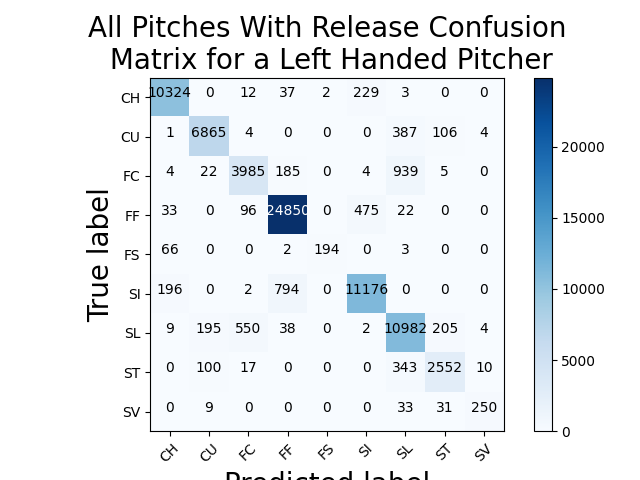

In [55]:
everythingWithRelease("L")

Model of 5 similar pitches

Model of slider/cutter

In [40]:
# this function tests how well we can distinguish
# between slider and cutter, pitches that behave similarly

def cutSlider():
    xData = pd.read_csv('./DataSets/bigData.csv')
    
    xData = xData.dropna()
    xData.rename(columns= {'Unnamed: 0':'ID'}, inplace = True)
    xData = xData[xData['p_throws'] == 'R']
    xData = xData[(xData['pitch_type'] == 'FC') | (xData['pitch_type'] == 'SL')]
    xData.pop('ID')
    xData.pop('player_name')
    xData.pop('p_throws')
    
    yData = xData.pop('pitch_type')
    #xData = normalize(xData)
    
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4, random_state=0)
    
    forest = RandomForestClassifier()
    forest.fit(xTrain, yTrain)
    theScore = forest.score(xTest, yTest)
    print(theScore)
    predictions = forest.predict(xTest)
    print(predictions)
    print(yTest)
    confMat = confusion_matrix(yTest, predictions)
    print(confMat)
    plt.figure()
    plot_confusion_matrix(confMat, classes=np.sort(yTest.unique()),
                      title='Cutter/Slider Without Release Confusion\n Matrix for a Right Handed Pitcher')

    plt.show()


0.8624435035818282
['SL' 'SL' 'SL' ... 'SL' 'SL' 'FC']
43854     SL
204242    SL
6500      FC
374755    FC
706198    SL
          ..
516468    SL
716291    FC
31141     SL
150641    SL
428010    FC
Name: pitch_type, Length: 55977, dtype: object
[[12792  4479]
 [ 3221 35485]]


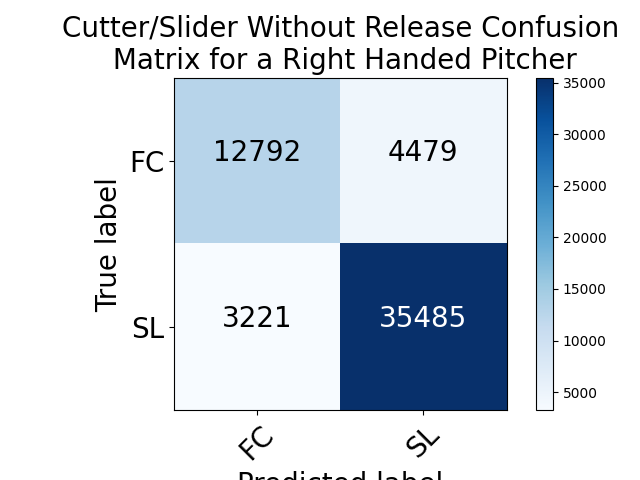

In [41]:
cutSlider()

Done with what we need, outputs with 90.6% accuracy in 17 seconds for rightys, and 93.2% accuracy in 15 seconds for leftys.

Going to try to implement a cool KNN algorithm that given a pitch, tells the user the 5 most similar pitches thrown.

In [60]:
# this function attempts to output the
# top 5 most similar pitches thrown in comparison
# to the input pitch

def similarPitches(hand):
    xData = pd.read_csv('./DataSets/bigData.csv')
    xData = xData.dropna()
    xData.rename(columns= {'Unnamed: 0':'ID'}, inplace = True)
    
    if (hand == "R"):
        xData = xData[xData['p_throws'] == 'R']
    elif (hand == "L"):
        xData = xData[xData['p_throws'] == 'L']
    
    xData.pop('ID')
    xData.pop('p_throws')
    xData.pop('release_spin_rate')
    xData.pop('effective_speed')
    xData.pop('release_speed')
    print(xData)
    
    yData = xData.pop('player_name')
    zData = xData.pop('pitch_type')
    hData = []
    for i in range(len(yData)):
        hData.append((yData.iloc[i], zData.iloc[i]))
        
    hData = np.array(hData)
    
    xData = normalize(xData)
    
    xTrain, xTest, yTrain, yTest = train_test_split(xData, hData, test_size=15, random_state=0)
    knn = KNeighborsClassifier(metric='l2')
    knn.fit(xTrain,yTrain)
    
    output = knn.kneighbors(xTest, 5, False)
    for i in range(len(output)):
        print()
        print("Pitcher, pitch type")
        print(yTest[i])
        print("The following are the 5 'nearest' pitches and who threw them.")
        for j in range(5):
            print(hData[output[i][j]], end =" ")
            if j == 2:
                print()
        print()
            
    
    
    
    

In [61]:
similarPitches("R")

       pitch_type     player_name  pfx_x  pfx_z
0              CU     Sborz, Josh   1.14  -0.90
1              FF     Sborz, Josh  -0.35   1.45
2              CU     Sborz, Josh   1.06  -0.87
3              FF     Sborz, Josh  -0.63   1.56
4              FF     Sborz, Josh  -0.14   1.67
...           ...             ...    ...    ...
729769         SI  Castillo, Luis  -1.69   0.46
729770         FF  Castillo, Luis  -1.28   1.16
729771         FF  Castillo, Luis  -0.80   1.19
729772         SI  Castillo, Luis  -1.71   0.41
729773         FF  Castillo, Luis  -1.21   1.24

[534395 rows x 4 columns]

Pitcher, pitch type
['Bickford, Phil' 'FF']
The following are the 5 'nearest' pitches and who threw them.
['Medina, Luis' 'SL'] ['Gray, Jon' 'SL'] ['Barlow, Scott' 'SL'] 
['Romano, Jordan' 'SL'] ['Williams, Trevor' 'FF'] 

Pitcher, pitch type
['King, Michael' 'CH']
The following are the 5 'nearest' pitches and who threw them.
['Machado, Andrés' 'CH'] ['Olson, Reese' 'SL'] ['Greene, Hunter' 'SL